# Visualising A Network

This notebook runs visulisation on networks to help debug the classifications.

In [1]:
# Imports

import json
import yaml
import os
import numpy as np
import tensorflow as tf
import keras.backend as K
import matplotlib.pyplot as plt


# Lime Imports


# pip3 install --user lime
import lime
from lime import lime_image
from skimage.segmentation import mark_boundaries



# GradCAM (via Keras-Vis)

# pip3 install --user keras-vis
from vis.utils import utils
from vis.visualization import visualize_cam, overlay
import matplotlib.cm as cm


def postprocess(image):
    return ((image + 1) * 127.5).astype(np.uint8)

from keras.applications.xception import preprocess_input

import cv2

Using TensorFlow backend.


In [3]:
# Load the model
CAPTION_MAP_FILE = None
if CAPTION_MAP_FILE:
    if CAPTION_MAP_FILE.endswith('.json'):
        caption_map = json.load(open(CAPTION_MAP_FILE, 'r'))
    elif CAPTION_MAP_FILE.endswith('.yaml'):
        caption_map = yaml.load(open(CAPTION_MAP_FILE, 'r'))
    else:
        raise ValueError("Caption map file must be json or yaml")
else:
    caption_map = {"F": 0, "N": 1}  # Manually specify a caption map
    


In [4]:
# Load the model
MODEL_PATH = "/home/users/jsh/Documents/20181212roots"

# These are from unified - if this doesn't work use Inference class / load model manually
from abyss_deep_learning.keras.models import model_loader, model_creator
model_params = {}
model_params['input_dimensions'] = (299, 299, 3)
model_params['caption_type'] = "single"  # or multi
model_params['num_classes'] = len(caption_map.keys())
model_params['model_path'] = MODEL_PATH 
model_params['weights_path'] = None

model = model_loader(model_params)


Loading model from file
...Loading model definition
...Loading model weights
Done


In [5]:
# Load images
image_list = ["/home/users/jsh/Pictures/difficult_chainage.png"]

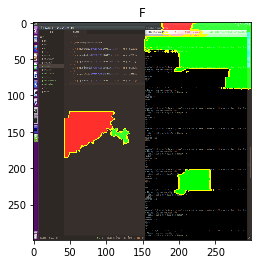

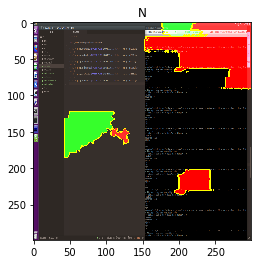

In [6]:
# Lime Visualisation

# https://github.com/marcotcr/lime

explainer = lime_image.LimeImageExplainer()

for imp in image_list:
    # Load the image
    img = preprocess_input(cv2.resize(cv2.imread(imp),model_params['input_dimensions'][:2]))
    # Make a prediction
    pred = model.predict(np.expand_dims(img, axis=0))
    # Create an explanation
    explanation = explainer.explain_instance(img, model.predict, top_labels=len(caption_map.keys()), batch_size=1, hide_color=0, num_samples=1000)
    # Run through each class
    for k in caption_map.keys():
        # Get the mask
        temp, mask = explanation.get_image_and_mask(caption_map[k], positive_only=False, num_features=8,
                                                    hide_rest=False)
        plt.figure()
        plt.imshow(mark_boundaries(postprocess(temp), mask))
        plt.title(k)
        # TODO TEST!!!
plt.show()
